In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [4]:
data=pd.read_csv(r'/content/drive/MyDrive/nlp projects/amazon_alexa.tsv',delimiter='\t',quoting=3)
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [5]:
print(f'Feature_names:{data.columns.values}')

Feature_names:['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [6]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
data['length']=data['verified_reviews'].apply(len)

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [10]:
#randomly checking the records
print(f"'verified_reviews'column value:{data.iloc[10]['verified_reviews']}")
print(f"length of the review:{len(data.iloc[10]['verified_reviews'])}")
print(f"length of the review:{len(data.iloc[10]['verified_reviews'])}")



'verified_reviews'column value:"I sent it to my 85 year old Dad, and he talks to it constantly."
length of the review:65
length of the review:65


In [13]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [14]:
%pip install wordcloud

In [20]:
#distinct values of rating and its count

print(f"rating value count:\n {data['rating'].value_counts()}")

rating value count:
 5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


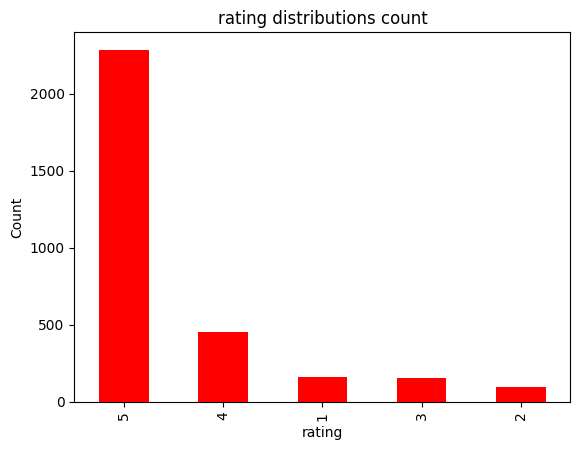

In [21]:
data['rating'].value_counts().plot.bar(color='red')
plt.title('rating distributions count')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

In [ ]:
fig=plt.figure(figsize=(7,7))
colors=('red','blue','orange','yellow','green')
wp={'linewidth':1,'edgecolor':'black'}
tags=data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',)

In [23]:
#Analyzing the feedback column
#1 means positive feedback
#0 means negative feedback
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


In [25]:
review_0=data[data['feedback']==0].iloc[1]['verified_reviews']
review_0

'Sound is terrible if u want good music too get a bose'

In [26]:
review_1=data[data['feedback']==1].iloc[1]['verified_reviews']
review_1

'Loved it!'

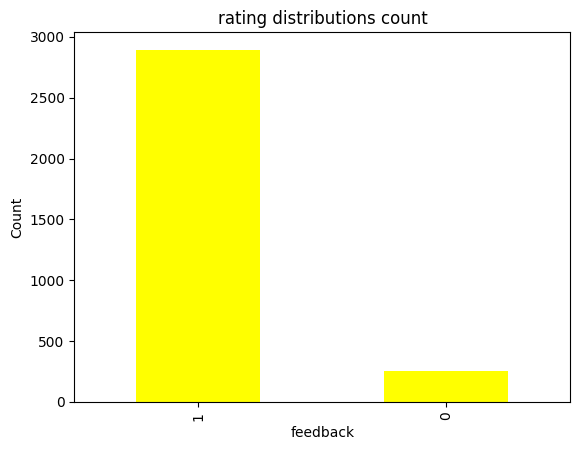

In [27]:
data['feedback'].value_counts().plot.bar(color='yellow')
plt.title('rating distributions count')
plt.xlabel('feedback')
plt.ylabel('Count')
plt.show()

In [28]:
data[data['feedback']==0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [29]:

data[data['feedback']==1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

In [31]:
print(f"variation value count: \n{data['variation'].value_counts()}")

variation value count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


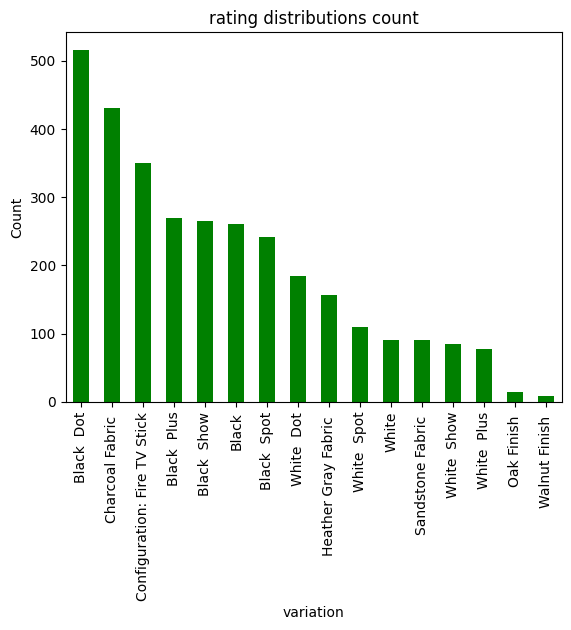

In [33]:
data['variation'].value_counts().plot.bar(color='green')
plt.title('rating distributions count')
plt.xlabel('variation')
plt.ylabel('Count')
plt.show()

In [34]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

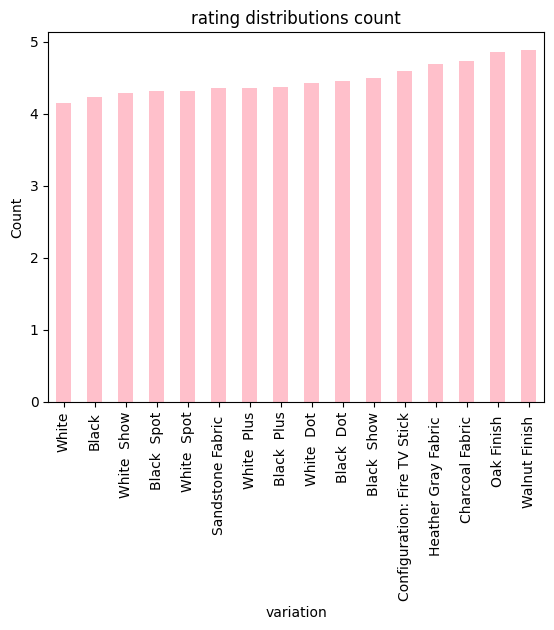

In [35]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='pink')
plt.title('rating distributions count')
plt.xlabel('variation')
plt.ylabel('Count')
plt.show()

In [36]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of reviews')]

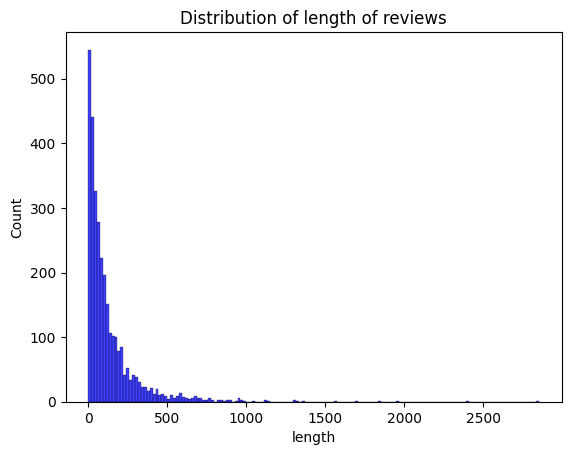

In [37]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of reviews')

In [38]:
#text data to vector
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

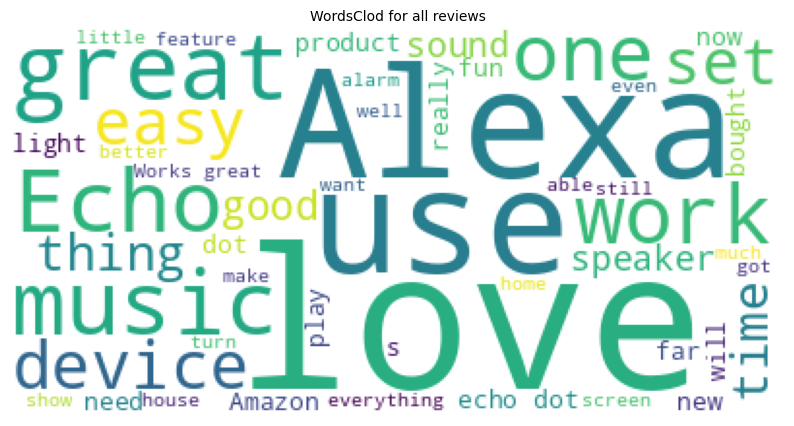

In [39]:
#combine them all the reviews
reviews=" ".join([review for review in data['verified_reviews']])

wc=WordCloud(background_color='white',max_words=50)

#generate the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordsClod for all reviews',fontsize=10)
plt.axis('off')
plt.show()

In [45]:
neg_reviews=" ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews=neg_reviews.lower().split()


pos_reviews=" ".join([review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews=pos_reviews.lower().split()

unique_negative=[x for x in neg_reviews if x not in pos_reviews]
unique_negative=" ".join(unique_negative)

unique_positive=[x for x in pos_reviews if x not in neg_reviews]
unique_positive=" ".join(unique_positive)


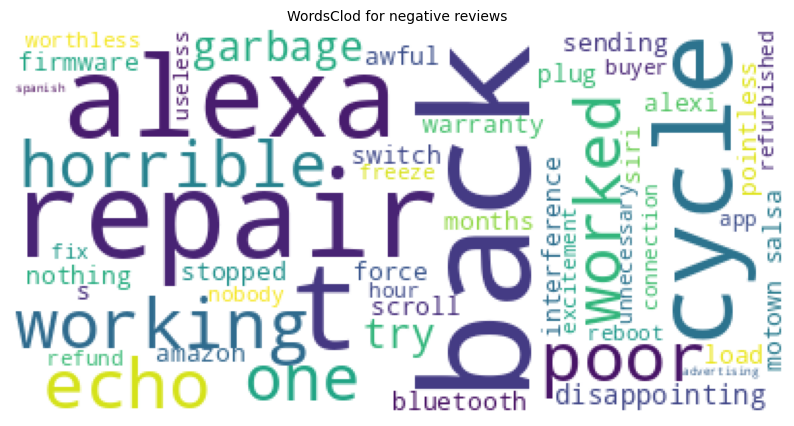

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordsClod for negative reviews',fontsize=10)
plt.axis('off')
plt.show()

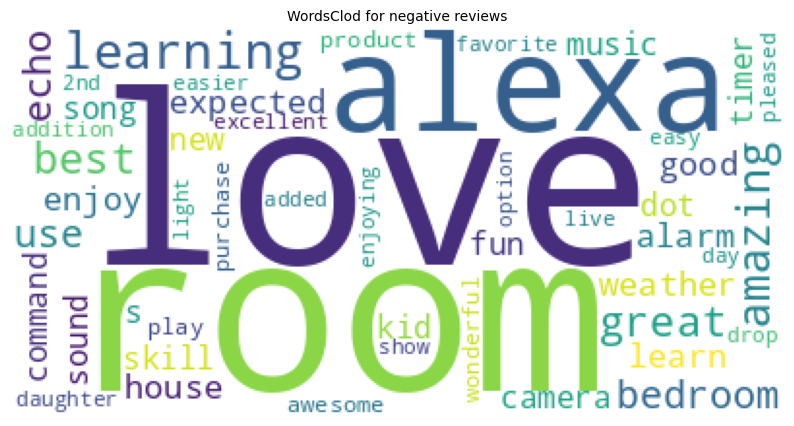

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordsClod for negative reviews',fontsize=10)
plt.axis('off')
plt.show()

In [47]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
  review=re.sub('[^a-zA-Z]',' ',data.iloc[i]['verified_reviews'])
  review=review.lower().split()
  review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
  review=" ".join(review)
  corpus.append(review)

In [48]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [50]:
pickle.dump(cv,open('Models/countVectorizer.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Models/countVectorizer.pkl'

In [52]:
print(f'x shape:{x.shape}')
print(f'y shape:{y.shape}')


x shape:(3150, 2500)
y shape:(3150,)


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

print(f'x train:{x_train.shape}')
print(f'y train:{y_train.shape}')
print(f'x test:{x_test.shape}')
print(f'y test:{y_test.shape}')

x train:(2205, 2500)
y train:(2205,)
x test:(945, 2500)
y test:(945,)


In [57]:
scaler=MinMaxScaler()

x_train_scl=scaler.fit_transform(x_train)
x_test_scl=scaler.transform(x_test)

In [59]:
pickle.dump(scaler,open('models\scaler.pkl','wb'))

In [60]:
#Random Forest

model_rf=RandomForestClassifier()
model_rf.fit(x_train_scl,y_train)


RandomForestClassifier()

In [61]:
print("training Accuracy: ",model_rf.score(x_train_scl,y_train))
print("testing Accuracy: ",model_rf.score(x_test_scl,y_test))


training Accuracy:  0.9941043083900227
testing Accuracy:  0.9375661375661376


In [64]:
y_pred=model_rf.predict(x_test_scl)

In [66]:
cm=confusion_matrix(y_test,y_pred)

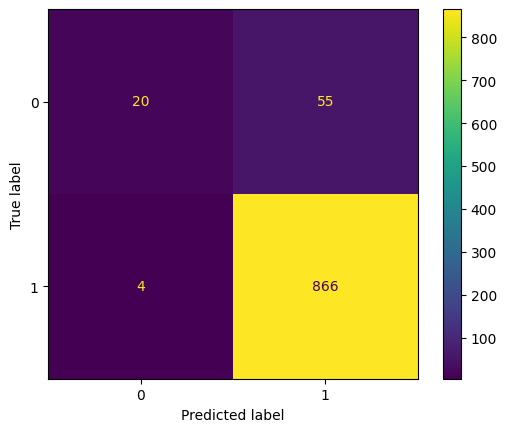

In [69]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [71]:
#xg boost
model_xgb=XGBClassifier()
model_xgb.fit(x_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
print("training Accuracy: ",model_xgb.score(x_train_scl,y_train))
print("testing Accuracy: ",model_xgb.score(x_test_scl,y_test))

training Accuracy:  0.9700680272108844
testing Accuracy:  0.9407407407407408


In [75]:
y_preds=model_xgb.predict(x_test_scl)

In [76]:
cm=confusion_matrix(y_test,y_preds)

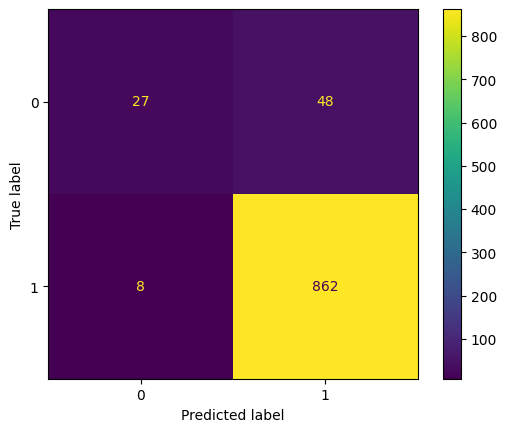

In [77]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()